In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [31]:
# reading the data for sept month in 2014 in newyork city
df = pd.read_csv('uber.csv')
df['Date/Time'] = df['Date/Time'].map(pd.to_datetime)
df.head()

,Date/Time,Lat,Lon,Base
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512


In [32]:
df.shape

(1028136, 4)

In [33]:
df['Day'] = df['Date/Time'].apply(lambda x:x.day)
df['Weekday'] = df['Date/Time'].apply(lambda x:x.weekday())
df['Hour'] = df['Date/Time'].apply(lambda x:x.hour)
df.head()

,Date/Time,Lat,Lon,Base,Day,Weekday,Hour
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,1,0,0
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,1,0,0
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,1,0,0
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,1,0,0
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,1,0,0


In [62]:
df.head(650)

,Date/Time,Lat,Lon,Base,Day,Weekday,Hour
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,1,0,0
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,1,0,0
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,1,0,0
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,1,0,0
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,1,0,0
...,...,...,...,...,...,...,...
645,2014-09-02 00:44:00,40.7631,-73.9808,B02512,2,1,0
646,2014-09-02 00:45:00,40.7494,-73.9923,B02512,2,1,0
647,2014-09-02 00:56:00,40.6335,-73.9518,B02512,2,1,0
648,2014-09-02 01:00:00,40.7337,-74.0064,B02512,2,1,1


In [34]:
df.tail()

,Date/Time,Lat,Lon,Base,Day,Weekday,Hour
1028131,2014-09-30 22:57:00,40.7668,-73.9845,B02764,30,1,22
1028132,2014-09-30 22:57:00,40.6911,-74.1773,B02764,30,1,22
1028133,2014-09-30 22:58:00,40.8519,-73.9319,B02764,30,1,22
1028134,2014-09-30 22:58:00,40.7081,-74.0066,B02764,30,1,22
1028135,2014-09-30 22:58:00,40.7140,-73.9496,B02764,30,1,22


C:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


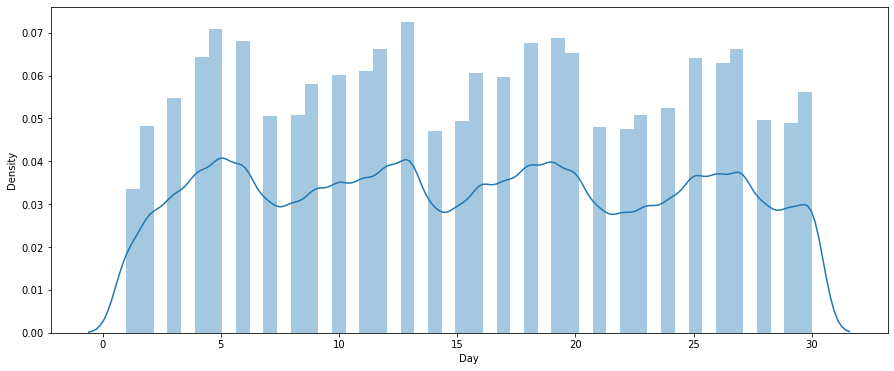

In [50]:
# analysing the dataset at each day

plt.figure(figsize = (15,6))
sns.distplot(df['Day'])
plt.show()

C:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


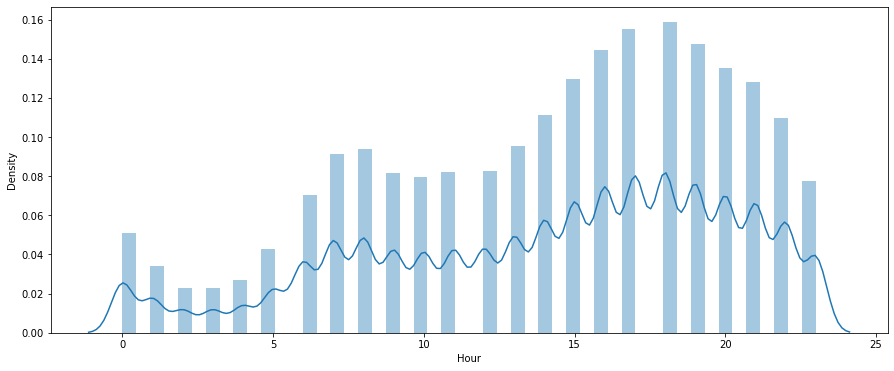

In [49]:
# analysing the dataset on hours

plt.figure(figsize = (15,6))
sns.distplot(df['Hour'])
plt.show()

C:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


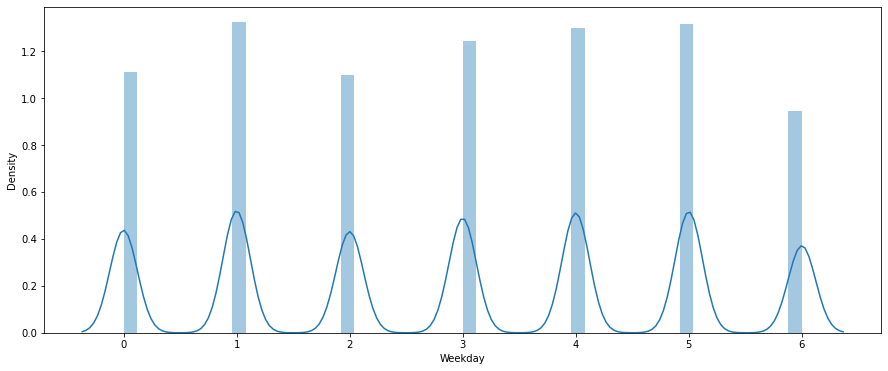

In [48]:
# analysing the dataset on weekdays

plt.figure(figsize = (15,6))
sns.distplot(df['Weekday'])
plt.show()

In [89]:
# grouping the data
data = df.groupby(['Weekday','Hour']).apply(lambda x : len(x))
data = data.unstack()
data

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Weekday,,,,,,,,,,,,,,,,,,,,,
0,1885,1201,977,1780,2479,3905,5668,7223,7287,5892,...,7113,8346,9513,9841,9611,8725,8318,6979,5130,2936
1,1411,784,609,1221,2093,4196,7393,9466,9374,7082,...,8374,9935,11108,12369,12184,11091,10370,9022,6538,2956
2,1489,885,597,966,1612,3130,5699,7067,6665,5356,...,6867,8331,9451,10294,10250,9268,9108,7951,6179,3408
3,1762,1037,714,1088,1720,2754,5586,7790,7663,6330,...,7419,8887,10196,11302,11738,10958,10076,9820,7885,5164
4,2513,1530,1002,1347,1819,3115,5186,6698,6715,5615,...,7431,8696,9792,11175,12315,11765,10345,10947,10797,9366
5,6909,4737,2957,2029,1458,1544,2092,2790,3664,4352,...,8732,9857,10494,11021,11753,11423,9841,10723,11173,10412
6,8164,5933,3846,2358,1494,1618,1683,2280,3109,3915,...,6707,7167,7670,7371,7189,6430,5930,5164,4115,2326


<AxesSubplot:xlabel='Hour', ylabel='Weekday'>

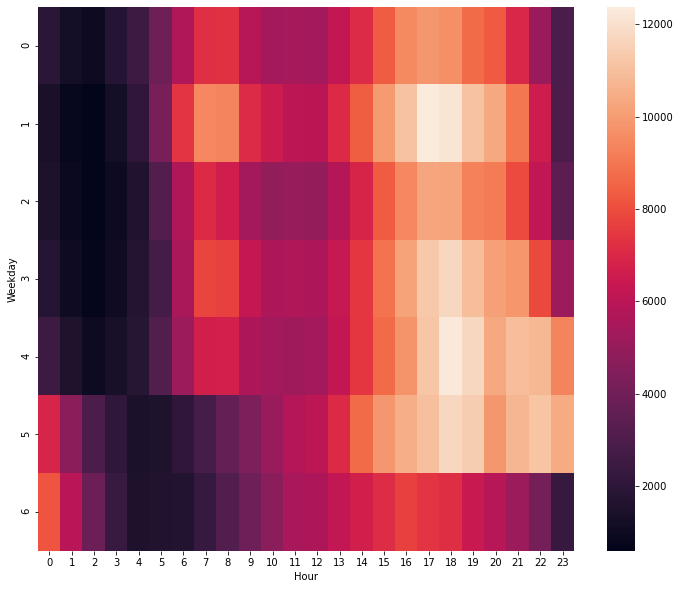

In [90]:
# finding correlation between Weekday and Hour

plt.figure(figsize=(12,10))
sns.heatmap(data)

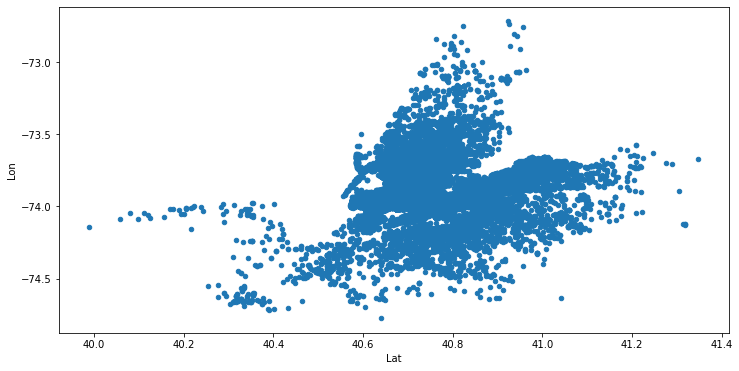

In [76]:
# scatter plot for latitude and longitude
df.plot(kind='scatter',x='Lat',y='Lon',figsize=(12,6))
plt.show()